# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [68]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

cities

Number of cities in the list: 616


['iqaluit',
 'tromso',
 'narwana',
 'bethel',
 'adamstown',
 'adrar',
 'longyearbyen',
 'redencao',
 'lijiang',
 'punta arenas',
 'brand-erbisdorf',
 'waitangi',
 'kuraymah',
 'blackmans bay',
 'port-aux-francais',
 'ribeira grande',
 'talnakh',
 'gongzhuling',
 'dudinka',
 'east london',
 'fort bragg',
 'hasaki',
 'papatowai',
 'qui nhon',
 'narrabri',
 'port blair',
 'qaqortoq',
 'albany',
 'mulayjah',
 'lake city',
 'bredasdorp',
 'borzya',
 'college',
 'oranjemund',
 'celestun',
 'colonia',
 'vizinga',
 'flying fish cove',
 'grytviken',
 'sadjoavato',
 'zaozersk',
 'edinburgh of the seven seas',
 'nema',
 'port lincoln',
 'gehrden',
 'constantia',
 'tiksi',
 'petropavlovsk-kamchatsky',
 'rabo de peixe',
 'hithadhoo',
 'whitehorse',
 'karratha',
 'afaahiti',
 "st. john's",
 'olonkinbyen',
 'codrington',
 'saminaka',
 'sitka',
 'capinzal',
 'callao',
 "nar'yan-mar",
 'touros',
 'tolanaro',
 'saint-francois',
 'bouca',
 'saipan',
 'mitu',
 'kudahuvadhoo',
 'yellowknife',
 'bamboo flat

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [69]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Set unit for temp
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp (C)": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | tromso
Processing Record 3 of Set 1 | narwana
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | adrar
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | redencao
Processing Record 9 of Set 1 | lijiang
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | brand-erbisdorf
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | kuraymah
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | gongzhuling
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | fort bragg
Processing Record 22 of Set 1 | hasaki
Processing Record

In [70]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City            591
Lat             591
Lng             591
Max Temp (C)    591
Humidity        591
Cloudiness      591
Wind Speed      591
Country         591
Date            591
dtype: int64

In [71]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,0.85,86,75,3.60,CA,1686456112
1,tromso,69.6496,18.9570,13.54,62,40,2.57,NO,1686456112
2,narwana,29.6167,76.1167,37.03,27,20,2.09,IN,1686456112
3,bethel,41.3712,-73.4140,17.64,78,78,0.91,US,1686456112
4,adamstown,-25.0660,-130.1015,20.70,55,81,6.66,PN,1686456113


In [72]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [73]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,86,75,3.60,CA,1686456112
1,tromso,69.6496,18.9570,13.54,62,40,2.57,NO,1686456112
2,narwana,29.6167,76.1167,37.03,27,20,2.09,IN,1686456112
3,bethel,41.3712,-73.4140,17.64,78,78,0.91,US,1686456112
4,adamstown,-25.0660,-130.1015,20.70,55,81,6.66,PN,1686456113


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

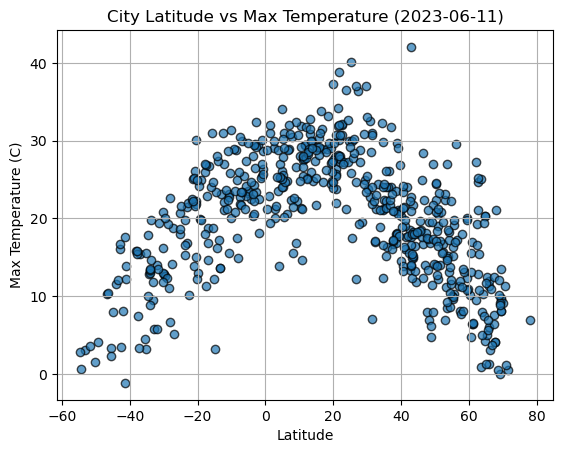

In [74]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp (C)"]


plt.scatter(lat, temp, alpha=.7, edgecolors="k")

# Format date
city_date = datetime.now()
city_date = city_date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature ({city_date})")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

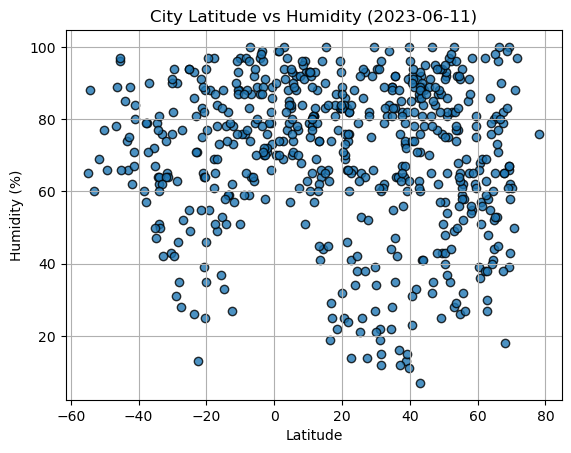

In [75]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

plt.scatter(lat,humidity, alpha=.8, edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({city_date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

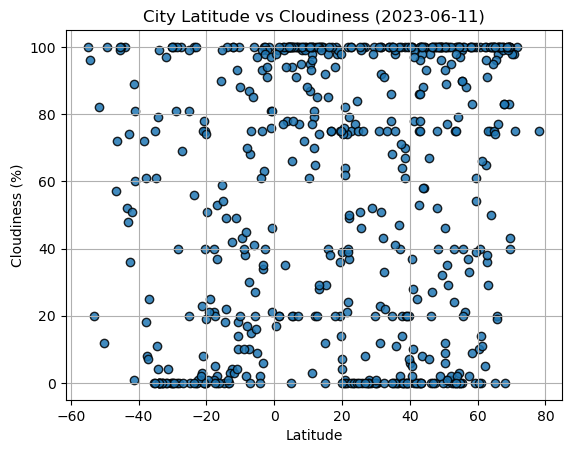

In [76]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

plt.scatter(lat,cloudiness,alpha=.85, edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({city_date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

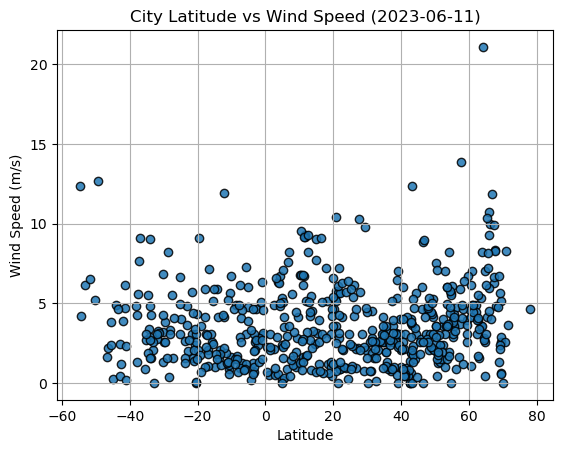

In [77]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lat,wind_speed,alpha=.85, edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({city_date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
# regress_values = x * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [91]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,0.85,86,75,3.60,CA,1686456112
1,tromso,69.6496,18.9570,13.54,62,40,2.57,NO,1686456112
2,narwana,29.6167,76.1167,37.03,27,20,2.09,IN,1686456112
3,bethel,41.3712,-73.4140,17.64,78,78,0.91,US,1686456112
5,adrar,20.5022,-10.0711,27.88,25,0,5.29,MR,1686456113


In [90]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
southern_hemi_lat = southern_hemi_df["Lat"]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (C),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,adamstown,-25.0660,-130.1015,20.70,55,81,6.66,PN,1686456113
7,redencao,-4.2258,-38.7306,22.49,97,2,0.20,BR,1686456114
9,punta arenas,-53.1500,-70.9167,3.06,60,20,6.17,CL,1686456094
11,waitangi,-43.9535,-176.5597,11.57,85,100,4.90,NZ,1686456114
13,blackmans bay,-43.0167,147.3167,16.07,66,48,2.44,AU,1686456115


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5313200011597924


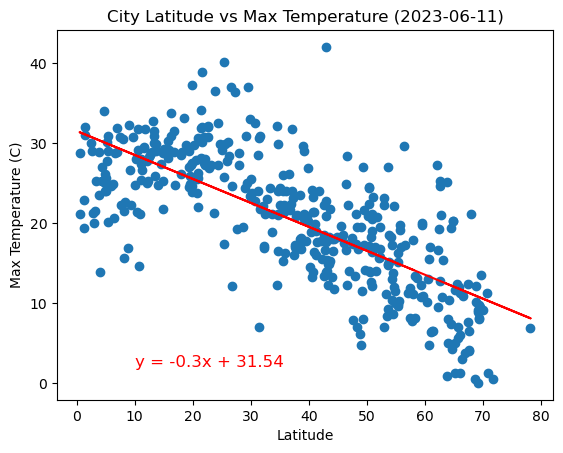

In [102]:
# Linear regression on Northern Hemisphere
x_north = northern_hemi_df["Lat"]
y_north_temp = northern_hemi_df["Max Temp (C)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north_temp)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue**2}')

plt.scatter(x_north,y_north_temp)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature ({city_date})")
plt.plot(x_north,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(10,2),fontsize=12,color="r")
plt.show()

The r-value is: 0.6021065586278043


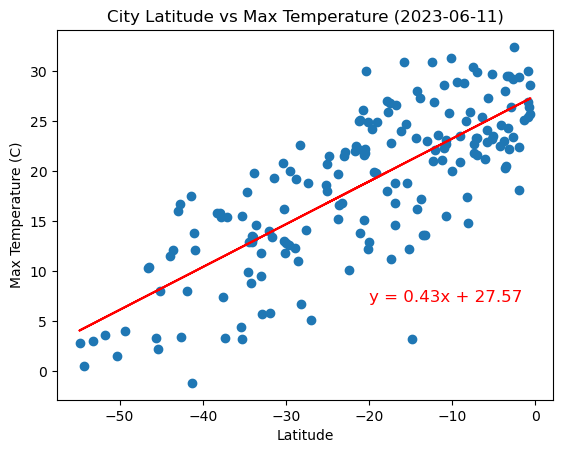

In [107]:
# Linear regression on Southern Hemisphere
x_south = southern_hemi_df["Lat"]
y_south_temp = southern_hemi_df["Max Temp (C)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south_temp)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue**2}')

plt.scatter(x_south,y_south_temp)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature ({city_date})")
plt.plot(x_south,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(-20,7),fontsize=12,color="r")
plt.show()


**Discussion about the linear relationship:** 
In the northern hemisphere, as the latitude increases, the temperature decreases (negative linear relationship).
In the southern hemisphere, as the latitude increases, the temperature increases (positive linear relationship).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.021063815742009405


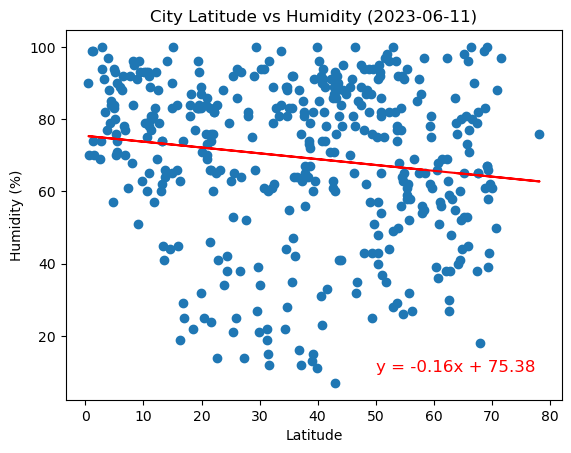

In [115]:
# Northern Hemisphere
y_north_humidity = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north_humidity)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue**2}')

plt.scatter(x_north,y_north_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({city_date})")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=12,color="r")
plt.show()


The r-value is: 0.02561716679102851


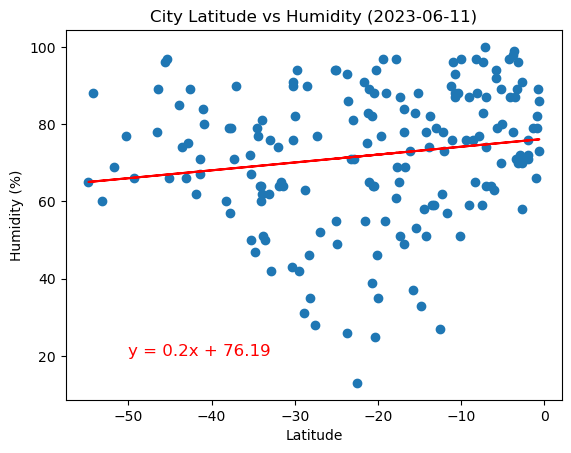

In [117]:
# Southern Hemisphere
y_south_humidity = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south_humidity)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue**2}')

plt.scatter(x_south,y_south_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({city_date})")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=12,color="r")
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere, as the latitude increases, the humidity decreases (negative linear relationship).
In the southern hemisphere, as the latitude increases, the humidity increases (positive linear relationship).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0013582723737508647


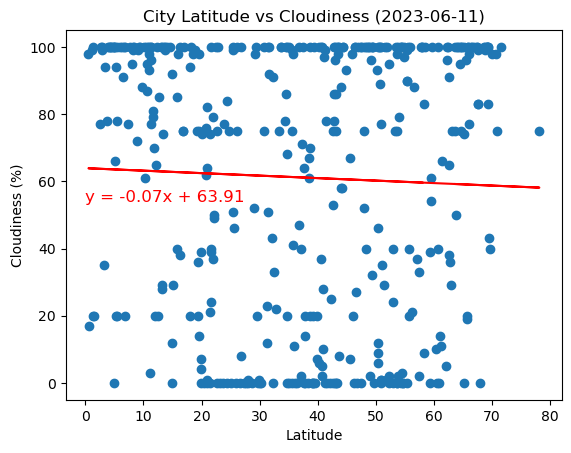

In [123]:
# Northern Hemisphere
y_north_cloudiness = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north_cloudiness)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue**2}')


plt.scatter(x_north,y_north_cloudiness)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({city_date})")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(0,54),fontsize=12,color="r")
plt.show()

The r-value is: 0.0001258881852145085


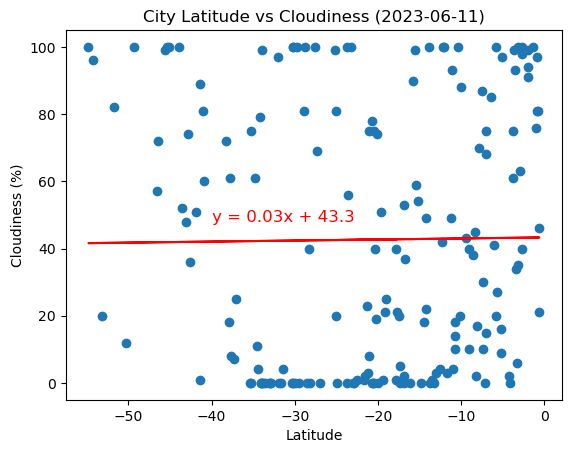

In [129]:
# Southern Hemisphere
y_south_cloudiness = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south_cloudiness)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue**2}')


plt.scatter(x_south,y_south_cloudiness)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({city_date})")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-40,48),fontsize=12,color="r")
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere, as the latitude increases, there is a mild decrease in cloudiness (mild negative linear relationship).
It is difficult to tell the relationship in the southern hemisphere, since, as the latitude increases, there is a very mild increase in cloudiness, which is almost close to no relationship between the two.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018241550475556145


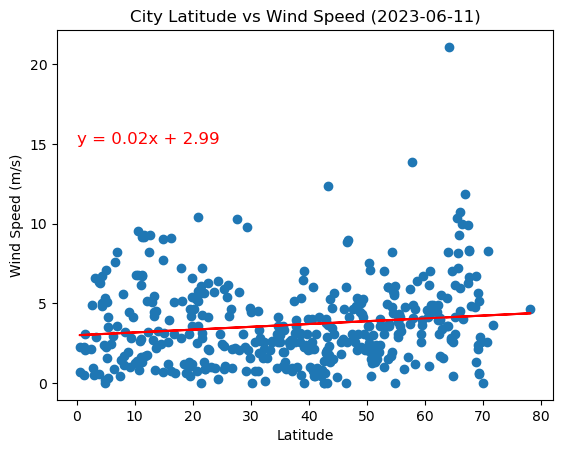

In [131]:
# Northern Hemisphere
y_north_wind = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north_wind)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue**2}')

plt.scatter(x_north,y_north_wind)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({city_date})")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=12,color="r")

plt.show()


The r-value is: 0.044383670444437105


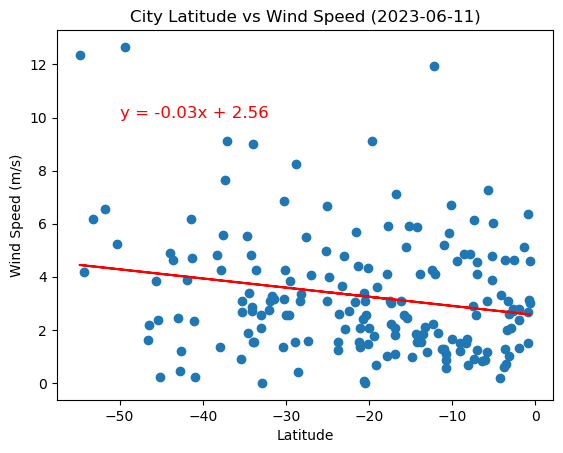

In [134]:
# Southern Hemisphere
y_south_wind = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south_wind)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The r-value is: {rvalue**2}')

plt.scatter(x_south,y_south_wind)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({city_date})")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=12,color="r")

plt.show()

**Discussion about the linear relationship:**
In the northern hemisphere, as the latitude increases, there is a mild increase in wind speed (mild positive linear relationship).
In the southern hemisphere, as the latitude increases, there is a decrease in wind speed (negative linear relationship).